<a href="https://colab.research.google.com/github/DikshantPatel2210/Amazon-Product-Reviews/blob/main/Amazon_Reviews_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("/content/amazon_alexa.tsv" , delimiter = "\t" , quoting = 3)

In [ ]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [ ]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
data[data["verified_reviews"].isnull()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
length              0
dtype: int64

In [ ]:
data["length"] = data["verified_reviews"].apply(len)

In [ ]:
data.head(11)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


In [ ]:
data.drop(columns= "lengh",inplace=True)

KeyError: "['lengh'] not found in axis"

In [ ]:
print(f"'verified_reviews' column value : {data.iloc[10]['verified_reviews']}")
print(f"Lengh of review : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length' column value :{data.iloc[10]['length']}")

'verified_reviews' column value : "I sent it to my 85 year old Dad, and he talks to it constantly."
Lengh of review : 65
'length' column value :65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 236.8+ KB


In [ ]:
data["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [ ]:
data.head(1)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13


##Rating Columns

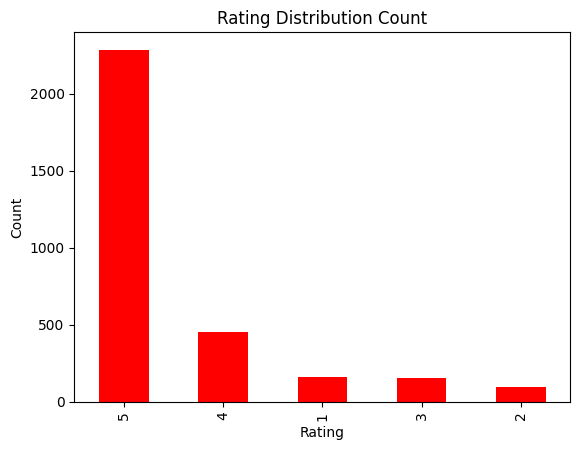

In [ ]:
data["rating"].value_counts().plot(kind ="bar", color = "red")
plt.title("Rating Distribution Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
print(f'Rating value count - percentage distribution : \n{round(data["rating"].value_counts()/data.shape[0]*100,2)}')

Rating value count - percentage distribution : 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distriburtion of rating'>

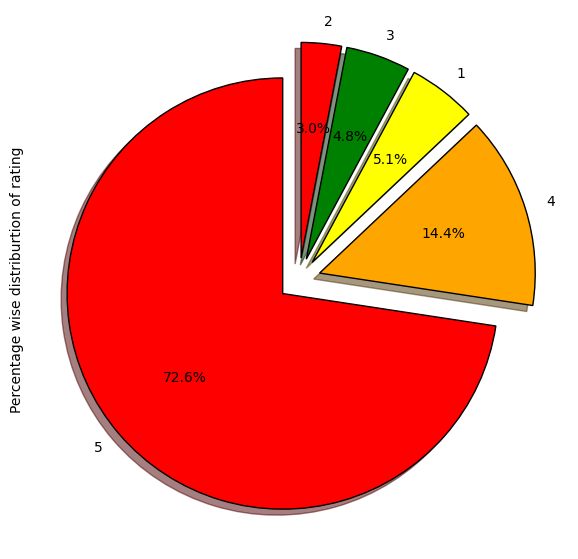

In [ ]:
fig = plt.figure(figsize = (7,7))
colors = {"red","green","orange","yellow"}
wp = {'linewidth' : 1, "edgecolor" : 'black'}
tags = data["rating"].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind = "pie",autopct= "%1.1f%%",shadow= True,colors= colors, startangle =90, wedgeprops = wp, explode = explode, label = "Percentage wise distriburtion of rating")

## Feedback Column

In [ ]:
print(f"Feedback value count : \n{data['feedback'].value_counts()}")

Feedback value count : 
feedback
1    2893
0     256
Name: count, dtype: int64


In [ ]:
review_0 = data[data['feedback']==0].iloc[1]["verified_reviews"]
review_0

'Sound is terrible if u want good music too get a bose'

<Axes: xlabel='feedback', ylabel='rating'>

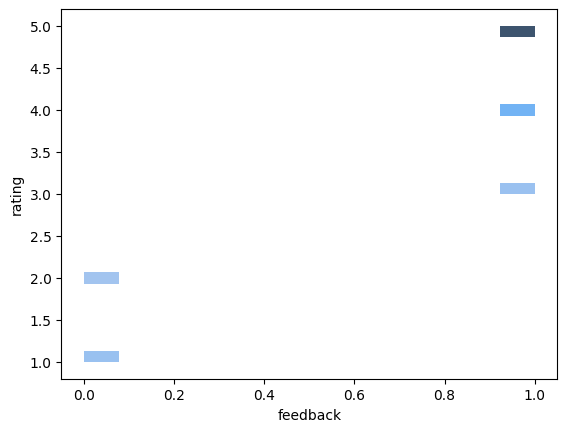

In [ ]:
sns.histplot(x = data["feedback"], y = data["rating"])

In [ ]:
review_1 = data[data['feedback']==1].iloc[1]["verified_reviews"]
review_1

'Loved it!'

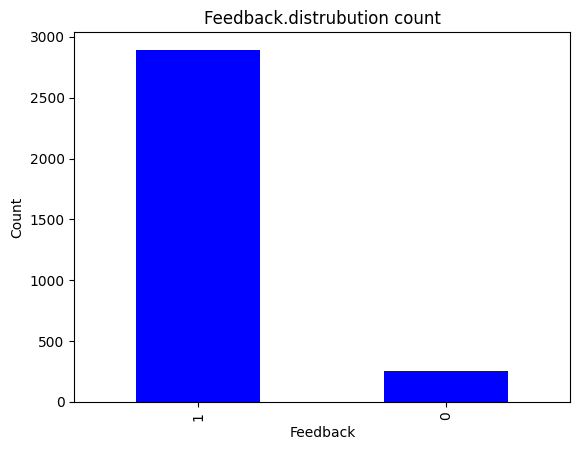

In [ ]:
data["feedback"].value_counts().plot(kind= "bar" , color = "blue")
plt.title("Feedback.distrubution count")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()

In [ ]:
print(f"Feedback value count - percentage distribution : \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution : 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distribution of feedback'>

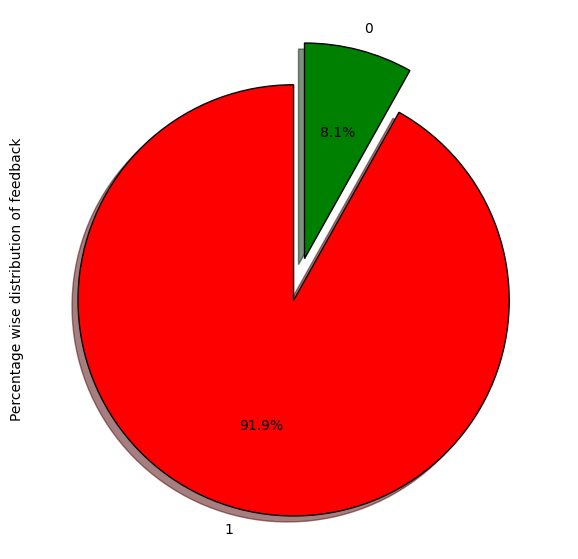

In [ ]:
fig = plt.figure(figsize = (7,7))
colors = ("red" ,"green")
wp = {"linewidth": 1 , "edgecolor" : "black"}
tags = data["feedback"].value_counts()/data.shape[0]
explode = (0.1 , 0.1)
tags.plot(kind = "pie", autopct = "%1.1f%%" , shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label="Percentage wise distribution of feedback")

In [ ]:
data[data["feedback"]==0]["rating"].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [ ]:
data[data["feedback"]==1]["rating"].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

##Variation Columns

In [ ]:
print(f"Variation value count : \n{data['variation'].value_counts()}")

Variation value count : 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


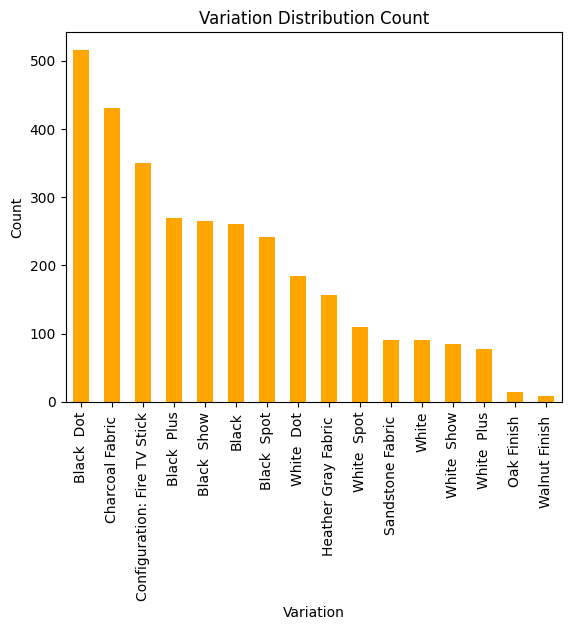

In [ ]:
data["variation"].value_counts().plot(kind = "bar", color = "orange", )
plt.title('Variation Distribution Count')
plt.xlabel("Variation")
plt.ylabel("Count")
plt.show()

In [ ]:
data.groupby("variation")["rating"].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

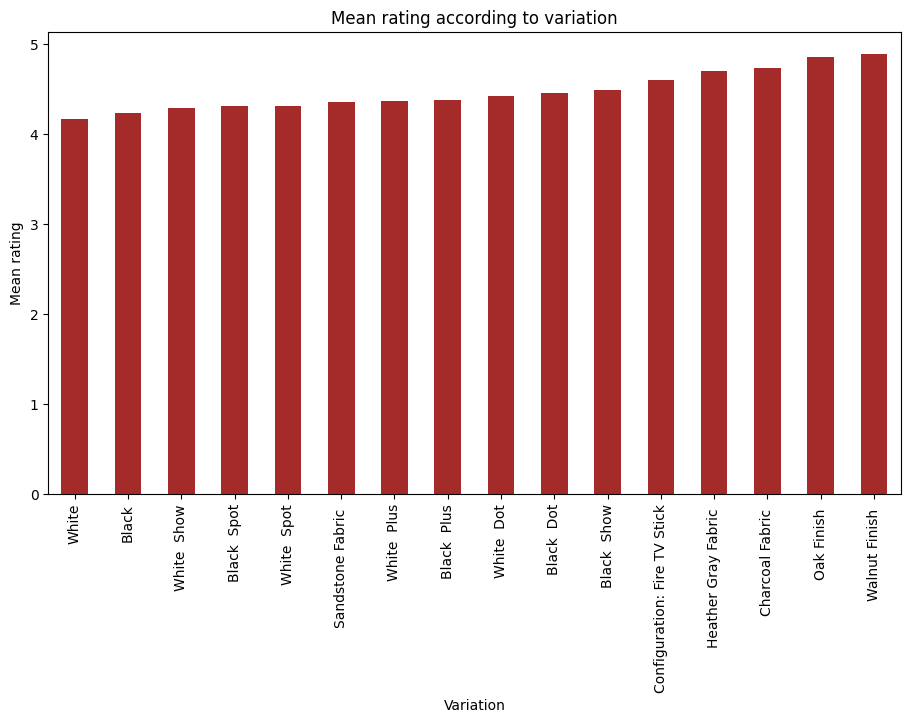

In [ ]:
data.groupby("variation")["rating"].mean().sort_values().plot(kind = "bar",color = "brown", figsize = (11,6))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean rating")
plt.show()

##verified_reviews

In [ ]:
data["length"].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of lengh of review')]

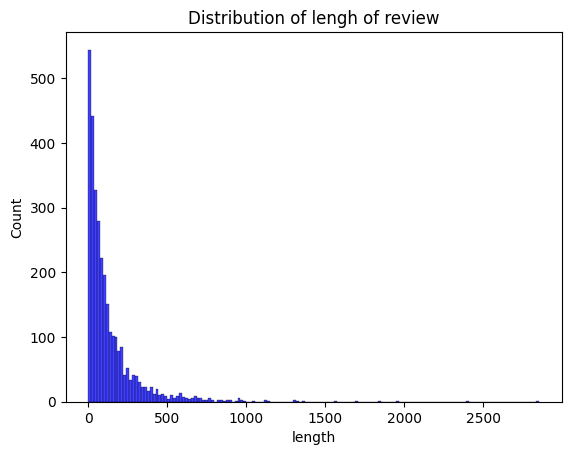

In [ ]:
sns.histplot(data["length"],color = "blue").set(title = "Distribution of lengh of review")

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

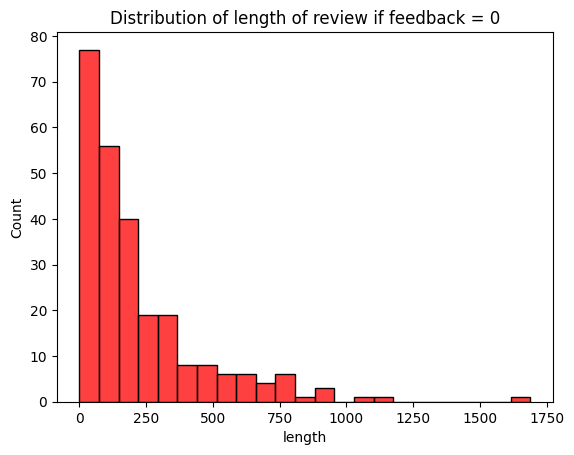

In [ ]:
sns.histplot(data[data["feedback"]==0]['length'],color = "red").set(title = "Distribution of length of review if feedback = 0")

[Text(0.5, 1.0, 'Distribution of lengh of review if feedback = 1')]

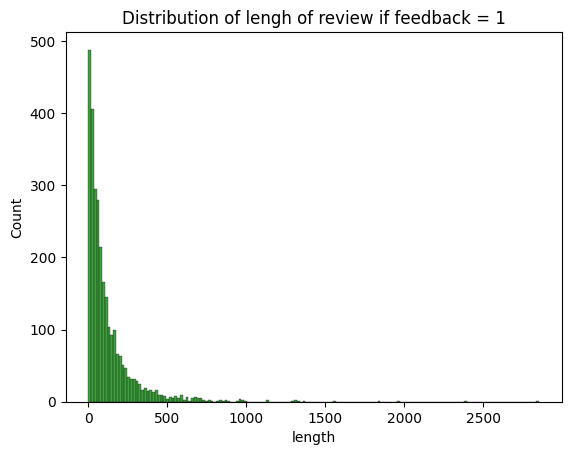

In [ ]:
sns.histplot(data[data["feedback"]==1]['length'], color = "green").set(title = "Distribution of lengh of review if feedback = 1")

<Axes: ylabel='Frequency'>

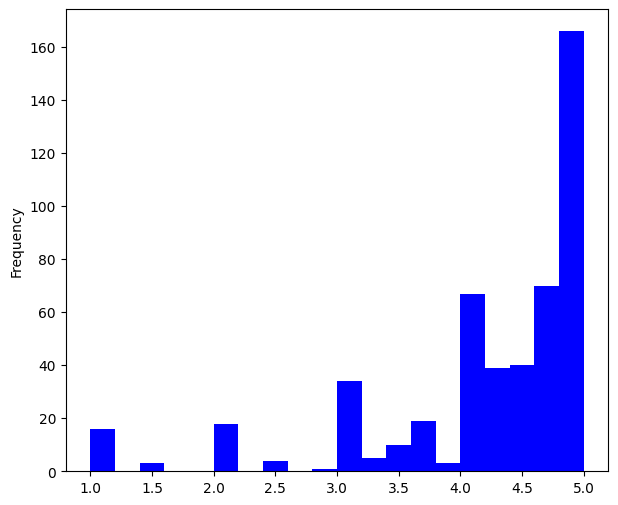

In [ ]:
data.groupby("length")["rating"].mean().plot(kind = "hist",color = "blue", figsize =(7,6), bins = 20 )

In [ ]:
cv  = CountVectorizer(stop_words= "english")
words = cv.fit_transform(data["verified_reviews"])

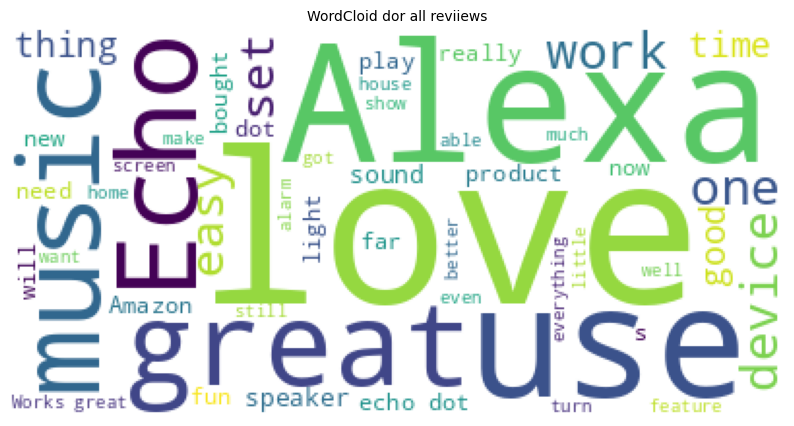

In [ ]:
reviews = " ".join([review for review in data["verified_reviews"]])

wc = WordCloud(background_color = "white" , max_words=50).generate(reviews)
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title("WordCloid dor all reviiews" , fontsize = 10)
plt.axis("off")
plt.show()

In [ ]:
neg_reviews = " ".join([review for review in data[data["feedback"]== 0]["verified_reviews"]])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data["feedback"]==1]["verified_reviews"]])
pos_reviews = pos_reviews.lower().split()

unique_negative = [ x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

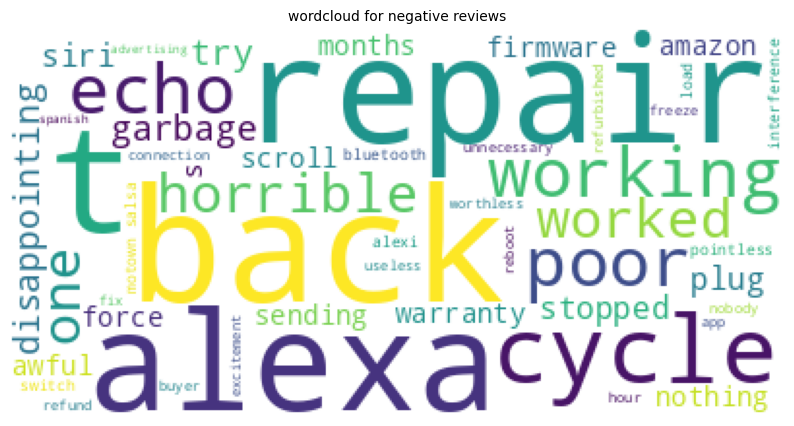

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_negative))
plt.title("wordcloud for negative reviews", fontsize = 10)
plt.axis("off")
plt.show()

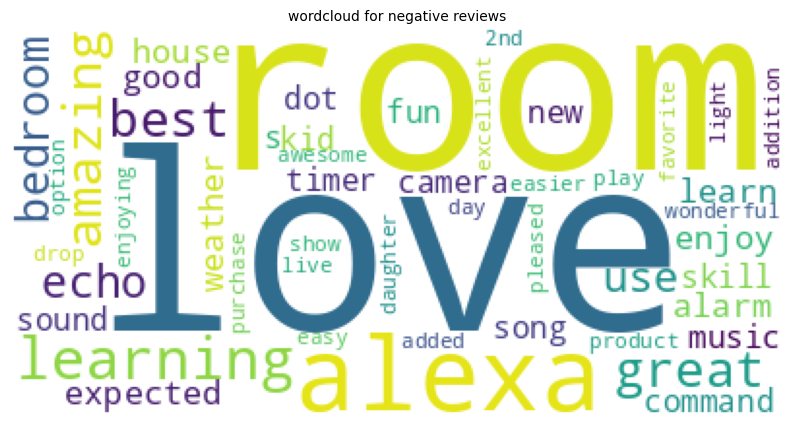

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_positive))
plt.title("wordcloud for negative reviews", fontsize = 10)
plt.axis("off")
plt.show()

##Preprocessing and Model

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0 , data.shape[0]):
  review = re.sub("[^a-zA-Z]", " ", data.iloc[i]["verified_reviews"])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = " ".join(review)
  corpus.append(review)

In [ ]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

# Bag of Words

In [ ]:
cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(corpus).toarray()
y = data["feedback"].values

In [ ]:
pickle.dump(cv , open("CountVectorizer", "wb"))

In [ ]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (3149, 2500)
y shape : (3149,)


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state = 5)

print(f"X train : {X_train.shape}")
print(f"y train : {y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y test : {y_test.shape}")

X train : (2204, 2500)
y train : (2204,)
X test : (945, 2500)
y test : (945,)


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 236.8+ KB


In [ ]:
print(f"X train max value : {X_train.max()}")
print(f"X test max value : {X_test.max()}")

X train max value : 10
X test max value : 12


In [ ]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

Random Forest

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy : ", model_rf.score(X_test_scl , y_test))

Training Accuracy : 0.9936479128856625
Testing Accuracy :  0.946031746031746


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

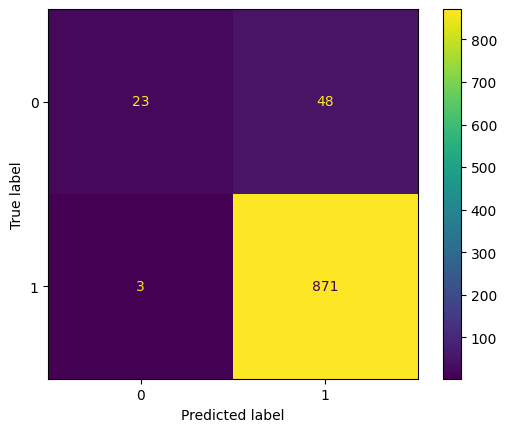

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

k fold cross-validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl , y = y_train, cv = 10)
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9324002468120115
Standard Variance : 0.009776334281594318


In [ ]:
params = {
    "bootstrap" : [True],
    "max_depth" : [80 , 100],
    "min_samples_split" : [8, 12],
    "n_estimators" : [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator  = model_rf , param_grid = params, cv = cv_object, verbose = 0 , return_train_score = True)
grid_search.fit(X_train_scl , y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_["mean_train_score"].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_["mean_test_score"].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test , y_preds))

Cross validation mean accuracy on train set : 97.04514519056262
Cross validation mean accuracy on test set : 91.93511796733212
Accuracy score for test set : 0.946031746031746


### XgBoost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("Train Accuracy :", model_xgb.score(X_train_scl , y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl , y_test))

Train Accuracy : 0.9723230490018149
Testing Accuracy : 0.9396825396825397


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test , y_preds)
print(cm)

[[ 23  48]
 [ 14 860]]


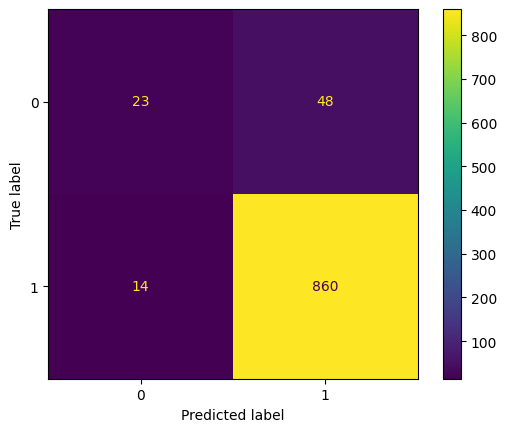

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
pickle.dump(model_xgb, open("model_xgb.pkl" , "wb"))


Decision Tree Classfier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [ ]:


print("Traing Accuracy :", model_dt.score(X_train_scl , y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl , y_test))

Traing Accuracy : 0.9936479128856625
Testing Accuracy : 0.9259259259259259


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 34  37]
 [ 37 837]]


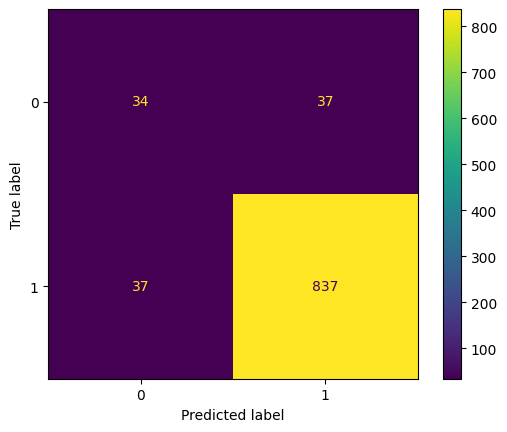

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_dt.classes_)
cm_display.plot()
plt.show()